<a href="https://colab.research.google.com/github/mevangelista-alvarado/neural_networks/blob/main/EjemploRedNeuronalMonocapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

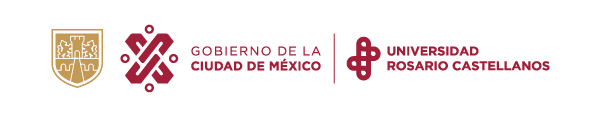

## Introducción

Mostramos un ejemplo en Python puro y otro en Pytorch, donde se implementa una red neuronal para resolver el problema de calcular el doble de un número.  

## Implementación en Python

Importamos los módulos necesarios

In [1]:
import random

Definimos los datos de entrenamiento, donde $x$ son los datos de entradas e $y$ son las etiquetas.

In [2]:
# Datos de entrenamiento
X = [1, 2, 3, 4, 5]  # Datos de entrada
y = [2, 4, 6, 8, 10]  # Datos de salida

Definimos el peso $w$ y sesgo $b$ inicial de forma aleatoria, así como la tasa de aprendizaje.

In [3]:
w = random.uniform(0, 1)  # Peso inicial
b = random.uniform(0, 1)  # Sesgo inicial
lr = 0.01  # Tasa de aprendizaje

Definimos el número de épocas para realizar el entrenamiento.

In [9]:
epochs = 800 #1000

Realizamos el entrenamiento

In [15]:
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        # Predicción de la neurona
        y_pred = w * X[i] + b

        # Cálculo del error
        error = y[i] - y_pred

        # Actualización de pesos y sesgo
        w += lr * error * X[i]
        b += lr * error

        total_error += error

    # Calcular el error cuadrático medio (MSE) promedio
    mse = total_error / len(X)

    # Mostrar el progreso
    if (epoch + 1) % 100 == 0:
        _mse = "{:.20f}".format(mse)
        print(f'Época {epoch + 1}, MSE: {_mse}')

Época 100, MSE: -0.00000000000995017402
Época 200, MSE: -0.00000000000415001367
Época 300, MSE: -0.00000000000172990511
Época 400, MSE: -0.00000000000072182260
Época 500, MSE: -0.00000000000030135894
Época 600, MSE: -0.00000000000012603252
Época 700, MSE: -0.00000000000005178080
Época 800, MSE: -0.00000000000002282619


In [11]:
# Resultado final
print(f'Peso (w): {w}')
print(f'Sesgo (b): {b}')

Peso (w): 1.9999999619210058
Sesgo (b): 1.4844344999224212e-07


Comprobamos el comportamiento con valores distintos a los que entreno nuestro modelo.

In [12]:
# Nuevos datos de prueba
X_test = [6, 7, 8, 9, 10]

# Realizar predicciones con el modelo entrenado
predictions = [w * x + b for x in X_test]

# Imprimir las predicciones
for i in range(len(X_test)):
    print(f'Entrada: {X_test[i]}, Predicción: {predictions[i]}')

Entrada: 6, Predicción: 11.999999919969484
Entrada: 7, Predicción: 13.99999988189049
Entrada: 8, Predicción: 15.999999843811496
Entrada: 9, Predicción: 17.999999805732504
Entrada: 10, Predicción: 19.99999976765351


## Implementación en Pytorch

Importamos los módulos necesarios

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

Definimos los datos de entrenamiento, donde $x$ son los datos de entradas e $y$ son las etiquetas, en formato `Pytorch`

In [18]:
# Datos de entrenamiento
X = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float32)
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]], dtype=torch.float32)

Definimos el modelo de una red neuronal simple:

Se crea una clase llamada `SimpleNet` que hereda de `nn.Module`. En el constructor __init__, definimos una capa lineal (`nn.Linear`) con una entrada de 1 y una salida de 1. Esta capa representa una única neurona.

En el método `forward`, especificamos cómo se deben realizar las operaciones hacia adelante. En este caso, simplemente pasamos los datos de entrada a través de la capa lineal.

In [24]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc = nn.Linear(1, 1)

    def forward(self, x):
        return self.fc(x)

 Creamos una instancia del modelo

In [26]:
model = SimpleNet()

Definimos una función de pérdida (criterion) que mide la diferencia entre las predicciones del modelo y los valores reales. Usamos el error cuadrático medio (MSE) en este caso.


Configuramos un optimizador (optimizer) para actualizar los pesos del modelo durante el entrenamiento. Usamos el optimizador SGD (descenso de gradiente estocástico) con una tasa de aprendizaje de 0.01.

In [27]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Entrenamiento del modelo

En un bucle de entrenamiento, iteramos a través de 1000 épocas.

En cada época:

Realizamos una pasada hacia adelante (`forward pass`) para obtener las predicciones del modelo.

Calculamos la pérdida comparando las predicciones con los valores reales.

Realizamos una pasada hacia atrás (`backward pass`) para calcular los gradientes y actualizar los pesos del modelo con el optimizador.

Mostramos la pérdida en cada época, lo que nos permite seguir el progreso del entrenamiento.

In [36]:
for epoch in range(1000):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass y actualización de pesos
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        _mse = "{:.20f}".format(loss.item())
        print(f'Época {epoch + 1}, Pérdida (MSE): {_mse}')

Época 100, Pérdida (MSE): 0.00000050719575028779
Época 200, Pérdida (MSE): 0.00000027860176032846
Época 300, Pérdida (MSE): 0.00000015305489853290
Época 400, Pérdida (MSE): 0.00000008409615759319
Época 500, Pérdida (MSE): 0.00000004619585070031
Época 600, Pérdida (MSE): 0.00000002538031651511
Época 700, Pérdida (MSE): 0.00000001397017967975
Época 800, Pérdida (MSE): 0.00000000770610597556
Época 900, Pérdida (MSE): 0.00000000422494395025
Época 1000, Pérdida (MSE): 0.00000000234707897562


Comprobamos el comportamiento con valores distintos a los que entreno nuestro modelo.

In [38]:
# Evaluar el modelo
X_test = [[[5.0]], [[6.0]], [[7.0]], [[8.0]]]
for i in range(len(X_test)):
    predicted = model(torch.tensor(X_test[i], dtype=torch.float32))
    print(f'Entrada: {X_test[i]}, Predicción: {predicted.item()}')

Entrada: [[5.0]], Predicción: 9.999916076660156
Entrada: [[6.0]], Predicción: 11.999876022338867
Entrada: [[7.0]], Predicción: 13.999835014343262
Entrada: [[8.0]], Predicción: 15.999794960021973


## Interpretación del MSE

El Error Cuadrático Medio (MSE, por sus siglas en inglés, Mean Squared Error) es una medida de cuánto se desvían las predicciones de un modelo de regresión lineal de los valores reales en un conjunto de datos.


Es ampliamente utilizado en la evaluación de modelos de regresión y representa la diferencia cuadrada promedio entre las predicciones del modelo y los valores reales.

La fórmula del MSE se expresa de la siguiente manera:

$$mse = \frac{1}{n} \Sigma(y_{i} - \bar{y}_{i})^{2}$$

Donde:


*   $mse$ es el Error Cuadrático Medio.
*   $n$ es el número de puntos de datos en el conjunto de datos.
*   $y_{i}$ es el valor real (la etiqueta) para el punto $x_i$.
*   $\bar{y}_{i}$ es la predicción del modelo para el punto $x_i$.  

El MSE calcula la diferencia entre cada valor real y su predicción, lo eleva al cuadrado y luego toma el promedio de estas diferencias al dividir por el número total de puntos de datos.

El cuadrado se utiliza para darle un mayor peso a los errores más grandes y penalizarlos.

El valor correcto del Error Cuadrático Medio (MSE) depende en gran medida del contexto específico de tu problema y de las unidades de medida de tus datos.

Sin embargo, hay algunas pautas generales que se pueden seguir para interpretar el MSE:

__MSE Cercano a Cero__: Un MSE cercano a cero indica un excelente ajuste del modelo a los datos de entrenamiento. En términos generales, cuanto más cercano a cero sea el MSE, mejor será el modelo.

__MSE Pequeño__: Un MSE pequeño (por ejemplo, 0.01) sugiere un buen ajuste del modelo. Esto significa que las predicciones del modelo son muy similares a los valores reales y que el modelo es capaz de capturar eficazmente la relación entre las entradas y las salidas.

__MSE Moderado__: Un MSE moderado (por ejemplo, entre 0.1 y 1) podría considerarse aceptable en algunos casos. Esto depende de la tolerancia para el error en tu problema específico. En algunos casos, un ajuste más preciso puede ser necesario, mientras que en otros, un error moderado podría ser aceptable.

__MSE Grande__: Un MSE grande (por ejemplo, superior a 1) sugiere que el modelo tiene dificultades para ajustarse a los datos y puede no ser adecuado para el problema en cuestión. Un MSE significativamente alto indica que el modelo no está capturando bien la relación entre las entradas y las salidas.

Es importante destacar que el MSE debe interpretarse en relación con el contexto de tu problema.

Además, es fundamental considerar cómo el modelo se desempeña en datos de prueba independientes.

Por ejemplo, un MSE bajo en los datos de entrenamiento, pero un MSE alto en los datos de prueba, puede indicar que el modelo está sobreajustando (overfitting) a los datos de entrenamiento.